In [ ]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [1]:
import numpy
import random
import pylab
import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from hapi import *

HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider
import ipywidgets as widgets
from IPython.display import display

In [3]:
db_begin("H2O_1")
fetch("H2O", 1,1,  7182.0, 7184.0)
nu_H2O, sw_H2O = getColumns('H2O', ["nu", "sw"])
nu, coef = absorptionCoefficient_Lorentz(((1,1), (1,2), (1,3), (1,4), ), 'H2O', Environment = {'p': 0.04, 'T':296}, OmegaStep=0.001, GammaL = 'gamma_self', HITRAN_units = True)

Using H2O_1

H2O
                     Lines parsed: 38

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to H2O_1/H2O.data
Header written to H2O_1/H2O.header
END DOWNLOAD
                     Lines parsed: 38
PROCESSED
{'self': 1.0}
0.022022 seconds elapsed for abscoef; nlines = 38


In [4]:
def get_data(name):
    data = pd.read_csv(name, delimiter='\t').replace(to_replace=',', value =  '.', regex = True).astype('float')
    return data

In [5]:
monitor_data = get_data("datadata/monitor.txt")
calibration_data = get_data("datadata/калибровка.txt")
Fabri_Pero_data = get_data("datadata/фабри-перо2 ток накачки и амплитуда сигнала.txt")
data = get_data("datadata/2")

In [6]:
data

,Time - ADC Voltage,Amplitude - ADC Voltage
0,0.0,0.014648
1,0.1,0.014801
2,0.2,0.014801
3,0.3,0.014954
4,0.4,0.014954
...,...,...
995,0.0,0.014801
996,0.0,0.014648
997,0.0,0.014496
998,0.0,0.014801


In [7]:
'''
fig = go.Figure()
fig.add_trace(go.Scatter(x=monitor_data['Time - ADC Voltage'], y=monitor_data['Amplitude - ADC Voltage'], name = 'Monitor'))
fig.add_trace(go.Scatter(x=calibration_data['Time - ADC Voltage'], y=calibration_data['Amplitude - ADC Voltage'], name = 'Calibration'))
fig.add_trace(go.Scatter(x=Fabri_Pero_data['Time - ADC Voltage'], y=Fabri_Pero_data['Amplitude - ADC Voltage'], name = 'Fabri-Pero'))
fig.add_trace(go.Scatter(x=data['Time - ADC Voltage'], y=data['Amplitude - ADC Voltage'], name = 'Data'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Monitor Data",
                  xaxis_title="Time",
                  yaxis_title="Amplitude",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()
'''

'\nfig = go.Figure()\nfig.add_trace(go.Scatter(x=monitor_data[\'Time - ADC Voltage\'], y=monitor_data[\'Amplitude - ADC Voltage\'], name = \'Monitor\'))\nfig.add_trace(go.Scatter(x=calibration_data[\'Time - ADC Voltage\'], y=calibration_data[\'Amplitude - ADC Voltage\'], name = \'Calibration\'))\nfig.add_trace(go.Scatter(x=Fabri_Pero_data[\'Time - ADC Voltage\'], y=Fabri_Pero_data[\'Amplitude - ADC Voltage\'], name = \'Fabri-Pero\'))\nfig.add_trace(go.Scatter(x=data[\'Time - ADC Voltage\'], y=data[\'Amplitude - ADC Voltage\'], name = \'Data\'))\n\nfig.update_layout(legend_orientation="h",\n                  legend=dict(x=.5, xanchor="center"),\n                  title="Monitor Data",\n                  xaxis_title="Time",\n                  yaxis_title="Amplitude",\n                  margin=dict(l=0, r=0, t=30, b=0))\nfig.show()\n'

In [8]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def func(a, b, c, d, e, f):
    plt.figure(figsize =(20,10))
    x_1 = data['Time - ADC Voltage']
    plt.plot(x_1, a * x_1**5 + b*x_1**4+c*x_1**3+d*x_1**2+e*x_1+f, label='fitting')
    plt.plot(data['Time - ADC Voltage'], data['Amplitude - ADC Voltage'], label='Data')
    plt.ylim(0, 5)
    plt.title('Fitting', fontsize=22)
    plt.xlabel('Data Point', fontsize=16)
    plt.ylabel('Amplitude', fontsize=16)
    plt.legend(fontsize=14)

    plt.tight_layout()
    plt.show()
    print(f"{a}*x**5+{b}*x**4+{c}*x**3+{d}*x**2+{e}*x+{f}")
    
interactive_plot = interactive(func, 
                               a=FloatSlider(value=0, min = -1, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               b=FloatSlider(value=0, min = -1, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               c=FloatSlider(value=-8e-7, min = -1, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               d=FloatSlider(value=5e-5, min = -1, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               e=FloatSlider(value=0.0584, min = -1, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               f=FloatSlider(value=-0.20, min = -5, max = 5, step = 0.0001, continuous_update = True, readout_format='.7f',));#, b=(-3, 3, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0, readout_format='.7f', step=1e…

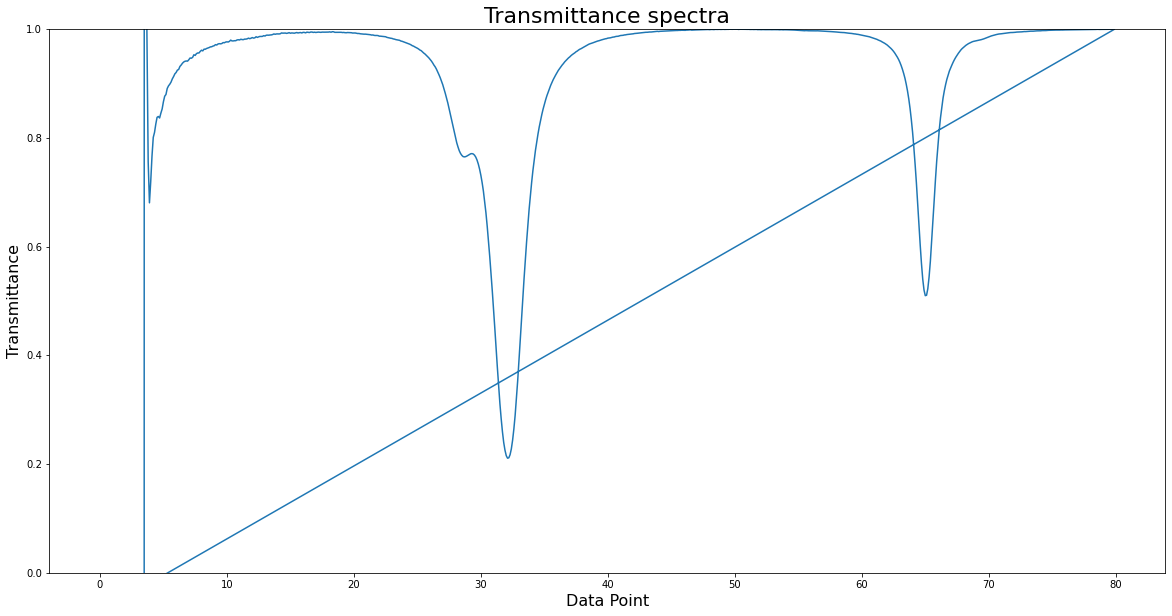

In [9]:
a, b, c, d, e, f = 0, 0, -8e-7, 5e-5, 0.0584, -0.200
plt.figure(figsize =(20,10))
x_D = data['Time - ADC Voltage']
y_D =  data['Amplitude - ADC Voltage']/(a * x_D**5 + b*x_D**4+c*x_D**3+d*x_D**2+e*x_D+f)
#plt.plot(x_1, a * x_1**5 + b*x_1**4+c*x_1**3+d*x_1**2+e*x_1+f)plt.plot(data['Time - ADC Voltage'], data['Amplitude - ADC Voltage'])
plt.plot(x_D, y_D)
plt.ylim(0, 1)
plt.title('Transmittance spectra', fontsize=22)
plt.xlabel('Data Point', fontsize=16)
plt.ylabel('Transmittance', fontsize=16)
plt.show()

In [10]:
def maximums(x, y):
    points_x, points_y = [], []
    for i in range(1, len(y)-1):
        if ((y[i-1]<y[i] and y[i]>y[i+1])or (y[i-1]<y[i]>=y[i+1]))and y[i]>=0.1 :
            points_x.append(x[i])
            points_y.append(y[i])
    return np.array(points_x), np.array(points_y)

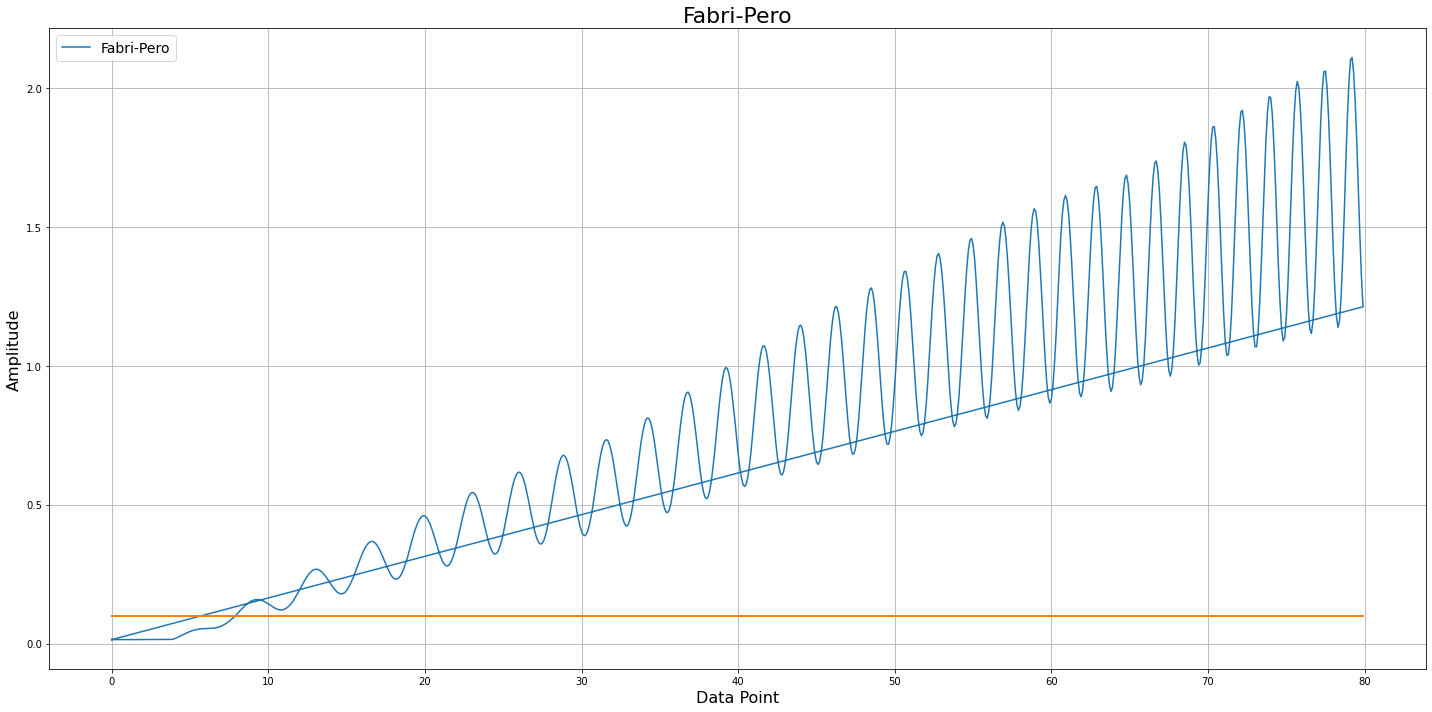

In [11]:
#_________FABRI_PERO_PLOT________________________________
plt.figure(figsize =(20,10))
x_F = Fabri_Pero_data['Time - ADC Voltage'] 
y_F =  Fabri_Pero_data['Amplitude - ADC Voltage']
plt.plot(x_F, y_F, label = "Fabri-Pero")
plt.plot(Fabri_Pero_data['Time - ADC Voltage'] , np.ones(len(Fabri_Pero_data['Time - ADC Voltage'] ))*0.1)
plt.title('Fabri-Pero', fontsize=22)
plt.xlabel('Data Point', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

In [12]:
#________The rebuild function______________
Ln = 10
delta_nu = 1/(2*Ln)

#__________________________________________
data_points, _ = maximums(x_F, y_F)
wavenumber_points = np.zeros(len(data_points))

for i in range(1,len(data_points)+1):
    wavenumber_points[-i] = delta_nu*(i-1)

def func_1(a, b, c, d, e, f):
    plt.figure(figsize =(20,10))
    x_1 = data_points
    plt.plot(x_1, a * x_1**5 + b*x_1**4+c*x_1**3+d*x_1**2+e*x_1+f, label='fitting')
    #plt.plot(data['Time - ADC Voltage'], data['Amplitude - ADC Voltage'], label='Data')
    plt.plot(data_points, wavenumber_points, label='points_to_wavenumbers')

    plt.title('Points to data', fontsize=22)
    plt.xlabel('Data Point', fontsize=16)
    plt.ylabel('Wavenumber, cm-1', fontsize=16)
    plt.ylim(0, 1.6)
    plt.xlim(0, 80)
    plt.grid()
    plt.legend(fontsize=14)

    plt.tight_layout()
    plt.show()
    print(f"{a}*x**5+{b}*x**4+{c}*x**3+{d}*x**2+{e}*x+{f}")
    
interactive_plot = interactive(func_1, 
                               a=FloatSlider(value=0, min = -1, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               b=FloatSlider(value=0, min = -1, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               c=FloatSlider(value=0, min = -1, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               d=FloatSlider(value=-0.00011758, min = -1, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               e=FloatSlider(value=-0.01114824, min = -1, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               f=FloatSlider(value=1.61724214, min = -5, max = 5, step = 0.0001, continuous_update = True, readout_format='.7f',));#, b=(-3, 3, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0, readout_format='.7f', step=1e…

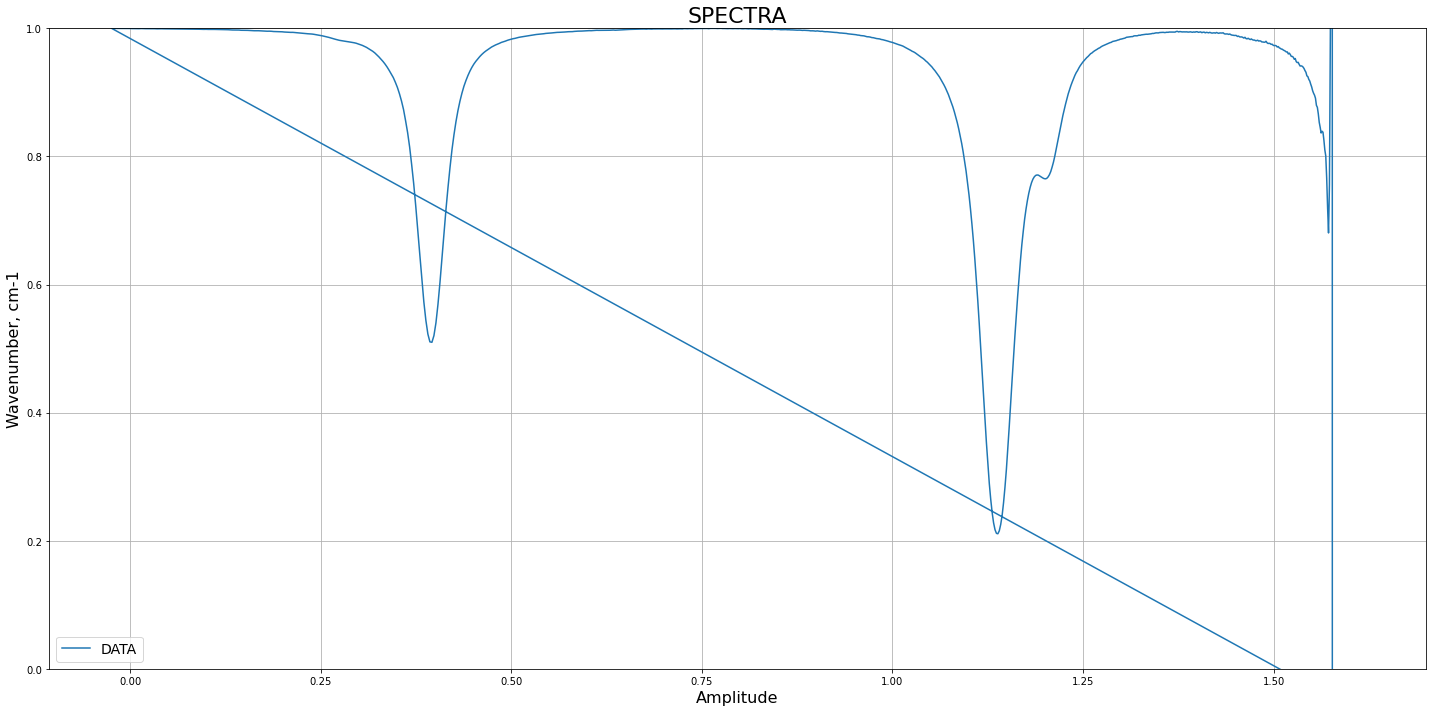

In [13]:
#_________________________________________________________________________________________________________________________
a, b, c, d, e, f = 0, 0, 0, -0.00011758, -0.01114824, 1.61724214
#_________________________________________________________________________________________________________________________
x = data['Time - ADC Voltage']
x = np.array(a*x**5+b*x**4+c*x**3+d*x**2+e*x+f)

plt.figure(figsize =(20,10))

plt.plot(x, y_D, label='DATA')

plt.title('SPECTRA', fontsize=22)
plt.xlabel('Amplitude', fontsize=16)
plt.ylabel('Wavenumber, cm-1', fontsize=16)
plt.ylim(0, 1)
plt.grid()
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

In [14]:
db_begin("H2O")
fetch_by_ids("H2O", [1, 2, 3, 4], 7182, 7183.5)

Using H2O

H2O
                     Lines parsed: 51

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to H2O/H2O.data
Header written to H2O/H2O.header
END DOWNLOAD
                     Lines parsed: 51
PROCESSED


In [15]:
#fig, ax = plt.subplots(2,3, figsize = (20, 10))
#________________________________________________________________________________
R = 8.31
N_AV = 6.022141e23
l = 32 #cm

#________________________________________________________________________________    
#print("PPM: ", cons*1e6)

def coeff(abs_nu, T, P, volume_mix_ratio):
    #fig, axs = plt.subplots(2,3, figsize=(20,10))
    V_m = (R*T)/(P*101325)
    L = (N_AV/V_m)
    n = (L*volume_mix_ratio)*1e-6
    #plt.figure(figsize =(20,10))

    nu, coef_L = absorptionCoefficient_Lorentz(SourceTables ="H2O",
                                               Environment = {'T':T, 'p':P},
                                               Diluent = {'self':volume_mix_ratio, 'air':1.-volume_mix_ratio},
                                               HITRAN_units = True)
    coef_D = absorptionCoefficient_Doppler(SourceTables ="H2O",
                                               Environment = {'T':T, 'p':P},
                                               Diluent = {'self':volume_mix_ratio, 'air':1.-volume_mix_ratio},
                                               HITRAN_units = True)[1]
    nu, coef_V = absorptionCoefficient_Voigt(SourceTables ="H2O",
                                               Environment = {'T':T, 'p':P},
                                               OmegaStep = 1e-5,
                                               Diluent = {'self':volume_mix_ratio, 'air':1.-volume_mix_ratio},
                                               HITRAN_units = True)
    plt.figure(figsize =(20,10))
    plt.plot(nu, numpy.exp(-coef_V*n*l)) 
    plt.plot(np.array(x)+abs_nu, y_D)
    #plt.figure(figsize = (20,10))
    #return nu, 1-numpy.exp(coef_L*n*l),1-numpy.exp(coef_D*n*l), 1-numpy.exp(coef_V*n*l)
    #axs[0][0].plot(nu, numpy.exp(-coef_L*n*l))  
    #axs[0][1].plot(nu, numpy.exp(-coef_D*n*l))  
    #axs[0][2].plot(nu, numpy.exp(-coef_V*n*l))  
    #axs[0][2].plot(np.array(x)+abs_nu, y_D)  
    #axs[1][1].plot(x+abs_nu, abs(numpy.exp(-coef_D*n*l))  
    #axs[1][2].plot(x+abs_nu, abs(numpy.exp(-coef_V*n*l))  


    
interactive_plot = interactive(coeff, 
                               abs_nu=FloatSlider(value=7181.812, min = 7170, max = 7190, step = 0.0001, continuous_update = True, readout_format='.5f',),
                               T=FloatSlider(value=296, min = 288, max = 350, step = 0.01, continuous_update = True,),
                               P=FloatSlider(value=0.04, min = 0.01, max = 0.5, step = 10e-7, continuous_update = True, readout_format='.7f',),
                               volume_mix_ratio=FloatSlider(value=0.7, min = 0, max = 1, step = 10e-7, continuous_update = True, readout_format='.7f',));
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(FloatSlider(value=7181.812, description='abs_nu', max=7190.0, min=7170.0, readout_format…